## 1. Importing Needed Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import glob
import re

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 2. Loading Data

In [2]:
path = r'C:\Users\nesha\Desktop\car_data' # data path
all_files = glob.glob(path + "\*.csv")

list_ = []

for filename in all_files:
    data = pd.read_csv(filename, index_col=0, header=0)
    list_.append(data)

df = pd.concat(list_, axis=0, ignore_index=True)
df.shape

(10015, 15)

In [3]:
df.head()

,Name,Mileage,Address,Rating,Fuel Type,City MPG,Highway MPG,Drivetrain,Engine,Exterior Color,Interior Color,Transmission,Entertainment,Safety,Price
0,2018 Volvo V60 T5 Dynamic,"37,386","Portland, OR 97214",4.9,Gasoline,25,36,FWD,2.0L I4 16V GDI DOHC Turbo,Onyx Black Metallic,-1,8-Speed Automatic,"['Bluetooth', 'Premium Sound System']","['Brake Assist', 'Stability Control', 'Automat...","$25,800"
1,2019 Audi A5 2.0T Premium,"22,028","Portland, OR 97201",4.8,Gasoline,23,34,AWD,2.0L I4 16V GDI DOHC Turbo,Glacier White Metallic,Black / Mercato Blue,7-Speed Automatic with Auto-Shift,"['Bluetooth', 'Premium Sound System', 'Apple C...","['Backup Camera', 'Brake Assist', 'Stability C...","$38,788"
2,2009 Volkswagen New Beetle 2.5,"86,721","Portland, OR 97232",4.9,Gasoline,20,29,FWD,2.5L I5 20V MPFI DOHC,Candy White,Black,6-Speed Automatic,-1,"['Brake Assist', 'Stability Control']","$8,599"
3,2018 Toyota Camry XLE,"11,936","Portland, OR 97209",3.6,Gasoline,28,39,FWD,Regular Unleaded V-6 3.5 L/211,Midnight Black Metallic,-1,Automatic,"['Bluetooth', 'Premium Sound System']","['Backup Camera', 'Brake Assist', 'Stability C...","$25,799"
4,2018 Lexus GX 460 Base,"33,065","Portland, OR 97239",4.3,Gasoline,15,18,4WD,4.6L V8 32V MPFI DOHC,Gray,Brown,6-Speed Automatic,"['Bluetooth', 'Premium Sound System']","['Backup Camera', 'Brake Assist', 'Stability C...","$39,990"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            10015 non-null  object 
 1   Mileage         10015 non-null  object 
 2   Address         10015 non-null  object 
 3   Rating          10015 non-null  float64
 4   Fuel Type       10015 non-null  object 
 5   City MPG        10015 non-null  int64  
 6   Highway MPG     10015 non-null  int64  
 7   Drivetrain      10015 non-null  object 
 8   Engine          10015 non-null  object 
 9   Exterior Color  10015 non-null  object 
 10  Interior Color  10015 non-null  object 
 11  Transmission    10015 non-null  object 
 12  Entertainment   10015 non-null  object 
 13  Safety          10015 non-null  object 
 14  Price           10015 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+ MB


In [5]:
df.iloc[5]

Name               2017 Jeep Wrangler Unlimited Sahara
Mileage                                         35,836
Address                             Portland, OR 97209
Rating                                             3.6
Fuel Type                                     Gasoline
City MPG                                            16
Highway MPG                                         21
Drivetrain                                         4WD
Engine                  Regular Unleaded V-6 3.6 L/220
Exterior Color      Granite Crystal Metallic Clearcoat
Interior Color                                   Black
Transmission                                 Automatic
Entertainment                            ['Bluetooth']
Safety                           ['Stability Control']
Price                                          $33,620
Name: 5, dtype: object

In [6]:
df.iloc[454]

Name                        Certified 2019 Volkswagen Jetta 1.4T SE
Mileage                                                      13,427
Address                                         Vancouver, WA 98662
Rating                                                          4.9
Fuel Type                                                  Gasoline
City MPG                                                         30
Highway MPG                                                      40
Drivetrain                                                      FWD
Engine                                   1.4L I4 16V GDI DOHC Turbo
Exterior Color                                                Black
Interior Color                                           Storm Gray
Transmission                                      8-Speed Automatic
Entertainment                                         ['Bluetooth']
Safety            ['Backup Camera', 'Brake Assist', 'Stability C...
Price                                           

## 3. Extracting Built-Year, Make and Model of Cars

In [7]:
#extracting the built year
def car_built_year(name):
    name_year = name.replace('Certified ','').strip()
    year = int(name_year.split(' ')[0])
    
    return year

In [8]:
df['Built Year'] = df['Name'].apply(car_built_year)

In [9]:
#extracting the make of the car
def car_make(name):
        return name.split(' ')[2]

In [10]:
df['Make'] = df['Name'].apply(car_make)

In [11]:
#extracting the model
def car_model(name):
    try:
        return name.split(' ')[3]
    except:
        return name.split(' ')[2]

In [12]:
df['Model'] = df['Name'].apply(car_model)

In [13]:
df.head()

,Name,Mileage,Address,Rating,Fuel Type,City MPG,Highway MPG,Drivetrain,Engine,Exterior Color,Interior Color,Transmission,Entertainment,Safety,Price,Built Year,Make,Model
0,2018 Volvo V60 T5 Dynamic,"37,386","Portland, OR 97214",4.9,Gasoline,25,36,FWD,2.0L I4 16V GDI DOHC Turbo,Onyx Black Metallic,-1,8-Speed Automatic,"['Bluetooth', 'Premium Sound System']","['Brake Assist', 'Stability Control', 'Automat...","$25,800",2018,Volvo,V60
1,2019 Audi A5 2.0T Premium,"22,028","Portland, OR 97201",4.8,Gasoline,23,34,AWD,2.0L I4 16V GDI DOHC Turbo,Glacier White Metallic,Black / Mercato Blue,7-Speed Automatic with Auto-Shift,"['Bluetooth', 'Premium Sound System', 'Apple C...","['Backup Camera', 'Brake Assist', 'Stability C...","$38,788",2019,Audi,A5
2,2009 Volkswagen New Beetle 2.5,"86,721","Portland, OR 97232",4.9,Gasoline,20,29,FWD,2.5L I5 20V MPFI DOHC,Candy White,Black,6-Speed Automatic,-1,"['Brake Assist', 'Stability Control']","$8,599",2009,Volkswagen,New
3,2018 Toyota Camry XLE,"11,936","Portland, OR 97209",3.6,Gasoline,28,39,FWD,Regular Unleaded V-6 3.5 L/211,Midnight Black Metallic,-1,Automatic,"['Bluetooth', 'Premium Sound System']","['Backup Camera', 'Brake Assist', 'Stability C...","$25,799",2018,Toyota,Camry
4,2018 Lexus GX 460 Base,"33,065","Portland, OR 97239",4.3,Gasoline,15,18,4WD,4.6L V8 32V MPFI DOHC,Gray,Brown,6-Speed Automatic,"['Bluetooth', 'Premium Sound System']","['Backup Camera', 'Brake Assist', 'Stability C...","$39,990",2018,Lexus,GX


In [14]:
df['Make'].value_counts()

Ford             970
Toyota           900
BMW              697
Chevrolet        664
Jeep             573
Honda            543
Mercedes-Benz    536
Audi             489
Hyundai          472
Subaru           455
Volkswagen       403
Nissan           389
GMC              309
Kia              266
Lexus            263
Mazda            253
Dodge            214
RAM              213
Land             164
Acura            141
Volvo            139
INFINITI         123
Cadillac         110
Porsche           97
Chrysler          93
Buick             87
MINI              66
Mitsubishi        64
Jaguar            57
Lincoln           54
Alfa              53
Tesla             44
Maserati          32
FIAT              21
Scion             17
Pontiac            7
Bentley            6
Genesis            6
Saturn             5
Ferrari            4
Rolls-Royce        3
Suzuki             3
smart              2
Saab               2
Daewoo             1
Hummer             1
Mercury            1
AC           

In [15]:
#combining car makes with lower counts into a single group called 'other'
make_other = df['Make'].value_counts()[df['Make'].value_counts() <= 10].index
df['Make'] = df['Make'].replace(make_other, 'Other')
df['Make'].value_counts()

Ford             970
Toyota           900
BMW              697
Chevrolet        664
Jeep             573
Honda            543
Mercedes-Benz    536
Audi             489
Hyundai          472
Subaru           455
Volkswagen       403
Nissan           389
GMC              309
Kia              266
Lexus            263
Mazda            253
Dodge            214
RAM              213
Land             164
Acura            141
Volvo            139
INFINITI         123
Cadillac         110
Porsche           97
Chrysler          93
Buick             87
MINI              66
Mitsubishi        64
Jaguar            57
Lincoln           54
Alfa              53
Tesla             44
Other             44
Maserati          32
FIAT              21
Scion             17
Name: Make, dtype: int64

In [16]:
df['Model'].value_counts()

F-150        235
Grand        211
Wrangler     197
Silverado    197
Rover        164
            ... 
535d           1
Sebring        1
Cayman         1
S500           1
xD             1
Name: Model, Length: 472, dtype: int64

In [17]:
#combining low count models into a single group called other
model_other = df['Model'].value_counts()[df['Model'].value_counts() <= 10].index
df['Model'] = df['Model'].replace(model_other, 'Other')
df['Model'].value_counts()

Other        895
F-150        235
Grand        211
Silverado    197
Wrangler     197
            ... 
Canyon        11
EcoSport      11
300           11
Patriot       11
TL            11
Name: Model, Length: 196, dtype: int64

## 4. Cleaning Numerical Data (Mileage and Price)

In [18]:
def car_mileage(mileage):
    return int(mileage.replace(',',''))

df['Mileage'] = df['Mileage'].apply(car_mileage)

def car_price(price):
    return int(price.replace('$','').replace(',',''))

df['Price'] = df['Price'].apply(car_price)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            10015 non-null  object 
 1   Mileage         10015 non-null  int64  
 2   Address         10015 non-null  object 
 3   Rating          10015 non-null  float64
 4   Fuel Type       10015 non-null  object 
 5   City MPG        10015 non-null  int64  
 6   Highway MPG     10015 non-null  int64  
 7   Drivetrain      10015 non-null  object 
 8   Engine          10015 non-null  object 
 9   Exterior Color  10015 non-null  object 
 10  Interior Color  10015 non-null  object 
 11  Transmission    10015 non-null  object 
 12  Entertainment   10015 non-null  object 
 13  Safety          10015 non-null  object 
 14  Price           10015 non-null  int64  
 15  Built Year      10015 non-null  int64  
 16  Make            10015 non-null  object 
 17  Model           10015 non-null 

## 5. Cleaning Drivetrain, Engine and Transmission Features

In [20]:
df['Drivetrain'].unique()

array([' FWD', ' AWD', ' 4WD', ' RWD', '-1', ' 4MATIC', ' quattro',
       ' 4X4'], dtype=object)

In [21]:
def car_drivetrain(drivetrain):
    """ cleanup the drivetrain inputs for further analysis."""
    
    if 'awd' in drivetrain.lower():
        return 'AWD'
    
    elif 'fwd' in drivetrain.lower():
        return 'FWD'
    
    elif '4wd' in drivetrain.lower() or '4x4' in drivetrain.lower():
        return '4WD'
    
    elif 'rwd' in drivetrain.lower():
        return 'RWD'
    
    elif '4matic' in drivetrain.lower():
        return '4MATIC'
    
    elif 'quattro' in drivetrain.lower():
        return 'Quattro'
     
    else:
        return np.nan

In [22]:
df['Drivetrain'] = df['Drivetrain'].apply(car_drivetrain)
df['Drivetrain'].value_counts()

AWD        3941
FWD        2937
4WD        2306
RWD         808
Quattro       2
4MATIC        1
Name: Drivetrain, dtype: int64

In [23]:
df.Engine.value_counts().head(60)

 2.0L I4 16V GDI DOHC Turbo                                 1138
 3.6L V6 24V MPFI DOHC                                       305
 1.5L I4 16V GDI DOHC Turbo                                  272
 2.0L I4 16V MPFI DOHC                                       267
 3.5L V6 24V MPFI DOHC                                       264
 3.6L V6 24V GDI DOHC                                        211
 3.5L V6 24V PDI DOHC                                        200
 5.3L V8 16V GDI OHV                                         191
 2.4L I4 16V GDI DOHC                                        190
 2.5L I4 16V MPFI DOHC                                       174
 2.5L I4 16V GDI DOHC                                        173
 Intercooled Turbo Premium Unleaded I-4 2.0 L/122            168
 Electric                                                    166
 Intercooled Turbo Premium Unleaded I-4 2.0 L/121            151
 1.8L I4 16V MPFI DOHC                                       141
 2.4L I4 16V MPFI SOHC   

In [24]:
def car_engine(engine):
    '''returns the cleaned up engine input.'''
    
    if 'intercooled' in engine.lower() or 'regular' in engine.lower() or 'electric' in engine.lower():
        return engine.strip().split(' ')[0]
    
    elif '-1' in engine.lower():
        return None
    
    elif 'twin' in engine.lower():
        return engine.strip(' ')[0:2]
    
    else:
        return engine.strip().split(' ')[0]

In [25]:
df['Engine'] = df['Engine'].apply(car_engine)
df.Engine.value_counts().head(20)

2.0L           1984
2.5L            887
3.5L            830
3.6L            635
Intercooled     565
2.4L            481
3.0L            445
1.5L            380
Regular         329
3.              321
1.8L            297
1.6L            263
5.3L            227
5.7L            184
Electric        166
1.4L            131
4.0L            125
6.7L            122
6.6L            101
6.2L             97
Name: Engine, dtype: int64

In [26]:
#limiting the number of categories by combining the low count engines into a single group
engine_other = df['Engine'].value_counts()[df['Engine'].value_counts() <= df.shape[0]*0.001].index
df['Engine'] = df['Engine'].replace(engine_other, 'Other')
df['Engine'].value_counts().head(20)

2.0L           1984
2.5L            887
3.5L            830
3.6L            635
Intercooled     565
2.4L            481
3.0L            445
1.5L            380
Regular         329
3.              321
1.8L            297
1.6L            263
5.3L            227
5.7L            184
Electric        166
1.4L            131
4.0L            125
6.7L            122
6.6L            101
6.2L             97
Name: Engine, dtype: int64

In [27]:
#let's look at Transmission column
df.Transmission.value_counts().head(20)

 6-Speed Automatic                    2129
 8-Speed Automatic                    1914
 Automatic                            1659
 Automatic CVT                        1376
 9-Speed Automatic                     554
 7-Speed Automatic with Auto-Shift     373
 5-Speed Automatic                     372
 4-Speed Automatic                     289
 10-Speed Automatic                    238
 7-Speed Automatic                     216
 6-Speed Manual                        207
 1-Speed Automatic                     159
 6-Speed Automatic with Auto-Shift     133
 5-Speed Manual                         83
 Manual                                 66
 Variable                               60
-1                                      41
 8-Speed Automatic with Auto-Shift      40
 CVT                                    14
 Automatic, 6-Spd                       11
Name: Transmission, dtype: int64

In [28]:
def car_transmission(transmission):
    '''returns either Automatic or Manual based on transmission input.'''
    
    if 'automatic' in transmission.lower():
        return 'Automatic'
    
    elif 'manual' in transmission.lower():
        return 'Manual'
    
    else:
        return None

In [29]:
df['Transmission'] = df['Transmission'].apply(car_transmission)
df['Transmission'].value_counts()

Automatic    9515
Manual        362
Name: Transmission, dtype: int64

## 6. Counting Entertainment and Safety Features

In [30]:
print(df['Entertainment'].head())
print(df['Safety'].head())

0                ['Bluetooth', 'Premium Sound System']
1    ['Bluetooth', 'Premium Sound System', 'Apple C...
2                                                   -1
3                ['Bluetooth', 'Premium Sound System']
4                ['Bluetooth', 'Premium Sound System']
Name: Entertainment, dtype: object
0    ['Brake Assist', 'Stability Control', 'Automat...
1    ['Backup Camera', 'Brake Assist', 'Stability C...
2                ['Brake Assist', 'Stability Control']
3    ['Backup Camera', 'Brake Assist', 'Stability C...
4    ['Backup Camera', 'Brake Assist', 'Stability C...
Name: Safety, dtype: object


In [31]:
#defining functions to extract the number of safety and entertainment features
def car_safety_count(safety):
    
    if '-1' in safety.lower():
        return None
    else:
        return len(safety.split(','))

def car_entertainment_count(entertainment):
    
    if '-1' in entertainment.lower():
        return None
    else:
        return len(entertainment.split(','))

In [32]:
df['Safety'] = df['Safety'].apply(car_safety_count)
df['Entertainment'] = df['Entertainment'].apply(car_entertainment_count)

In [33]:
#changing the columns names
df.rename(columns={'Entertainment': 'Entertainment Count', 'Safety': 'Safety Count'}, inplace=True)

## 7. Cleaning Interior and Exterior Colors

In [34]:
#let's look into Interior colors
df['Interior Color'].value_counts().head(50)

 Black                      3819
-1                          1546
 Gray                        823
 Jet Black                   471
 Ebony                       323
 Charcoal                    240
 Titan Black                 209
 Beige                       162
 Graphite                    150
 Charcoal Black               94
 Tan                          74
 Ash                          62
 Ivory                        59
 Dark Gray                    54
 Carbon Black                 52
 Ebony Black                  41
 Parchment                    36
 Medium Earth Gray            34
 Light Gray                   34
 Sport                        31
 Black / Red                  29
 Brown                        29
 Red                          28
 Ebony / Ebony                28
 Diesel Gray / Black          28
 Dark Slate Gray              26
 Nero                         26
 Medium Ash Gray              22
 Medium Light Stone           22
 Bisque                       21
 Espresso 

In [35]:
def car_interior_color(interior_color):

    if 'black' in interior_color.lower():
        return 'Black'
    
    elif 'gray' in interior_color.lower():
        return 'Gray'
    
    elif 'charcoal' in interior_color.lower():
        return 'Charcoal'
    
    elif 'graphite' in interior_color.lower():
        return 'Graphite'
   
    elif 'ebony' in interior_color.lower() or 'ebony black' in interior_color.lower():
        return 'Ebony'
    
    elif 'red' in interior_color.lower() or 'ginger' in interior_color.lower():
        return 'Red'
    
    elif 'cocoa' in interior_color.lower() or 'almond' in interior_color.lower() or 'espresso' in interior_color.lower() or 'mocha' in interior_color.lower() or 'brown' in interior_color.lower():
        return 'Brown'
    
    elif 'beige' in interior_color.lower():
        return 'Beige'
    
    elif '-1' in interior_color.lower():
        return np.nan
    
    else:
        return 'Other'

In [36]:
df['Interior Color'] = df['Interior Color'].apply(car_interior_color)
df['Interior Color'].value_counts()

Black       5096
Gray        1142
Other        822
Ebony        430
Charcoal     253
Beige        244
Brown        239
Graphite     160
Red           83
Name: Interior Color, dtype: int64

In [37]:
#now let's take a look at the exterior colors
df['Exterior Color'].value_counts().head(50)

 Black                                 749
 White                                 550
 Gray                                  368
 Silver                                313
-1                                     218
 Blue                                  176
 Red                                   161
 Summit White                          158
 Bright White Clearcoat                127
 Alpine White                          114
 Oxford White                          109
 Super White                           100
 Black Sapphire Metallic                96
 Pure White                             87
 Crystal White Pearl                    81
 Polar White                            73
 Crystal Black Pearl                    73
 Granite Crystal Clearcoat Metallic     73
 Jet Black                              70
 Gun Metallic                           69
 Magnetic Gray Metallic                 69
 Billet Silver Metallic Clearcoat       67
 Silver Ice Metallic                    64
 Black Clea

In [38]:
def car_exterior_color(exterior_color):
    
    if 'white' in exterior_color.lower():
        return 'White'
    
    elif 'gray' in exterior_color.lower():
        return 'Gray'
    
    elif 'black' in exterior_color.lower():
        return 'Black'
    
    elif 'metallic' in exterior_color.lower():
        return 'Metallic'
    
    elif 'silver' in exterior_color.lower():
        return 'Silver'
    
    elif 'blue' in exterior_color.lower():
        return 'Blue'
    
    elif 'red' in exterior_color.lower():
        return 'Red'
    
    elif '-1' in exterior_color.lower():
        return np.nan
    
    else:
        return 'Other'

In [39]:
df['Exterior Color'] = df['Exterior Color'].apply(car_exterior_color)
df['Exterior Color'].value_counts()

White       2141
Black       2107
Metallic    1997
Gray        1134
Other        811
Silver       567
Red          557
Blue         483
Name: Exterior Color, dtype: int64

## 8. Extracting the Zipcodes

In [40]:
print(df['Address'].head())
print(df['Address'].tail())

0    Portland, OR 97214
1    Portland, OR 97201
2    Portland, OR 97232
3    Portland, OR 97209
4    Portland, OR 97239
Name: Address, dtype: object
10010          Omak, WA 98841
10011          Omak, WA 98841
10012          Omak, WA 98841
10013     Washougal, WA 98671
10014    Moses Lake, WA 98837
Name: Address, dtype: object


In [41]:
def car_zipcode(address):
    return address.strip().split(' ')[2]

In [42]:
df['Zipcode'] = df['Address'].apply(car_zipcode)
df['Zipcode'].value_counts()

97267    478
97225    456
97301    422
98005    384
98101    371
        ... 
98926      1
98801      1
98665      1
98584      1
98902      1
Name: Zipcode, Length: 112, dtype: int64

## 9. Checking Up on Fuel Type

In [43]:
df['Fuel Type'].value_counts()

 Gasoline                  8688
 Hybrid                     415
 Diesel                     413
 E85 Flex Fuel              327
 Electric                   168
 Unknown                      3
 Compressed Natural Gas       1
Name: Fuel Type, dtype: int64

## 10. A Closer Look into the Data

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 10015 non-null  object 
 1   Mileage              10015 non-null  int64  
 2   Address              10015 non-null  object 
 3   Rating               10015 non-null  float64
 4   Fuel Type            10015 non-null  object 
 5   City MPG             10015 non-null  int64  
 6   Highway MPG          10015 non-null  int64  
 7   Drivetrain           9995 non-null   object 
 8   Engine               10006 non-null  object 
 9   Exterior Color       9797 non-null   object 
 10  Interior Color       8469 non-null   object 
 11  Transmission         9877 non-null   object 
 12  Entertainment Count  9091 non-null   float64
 13  Safety Count         9604 non-null   float64
 14  Price                10015 non-null  int64  
 15  Built Year           10015 non-null 

As we can see we have some null data in some of our features! Now the question is if we should drop them or do more EDA and find correlations before we do so!?

In [45]:
#Let's see how many null values we have for each feature
df.isna().sum()

Name                      0
Mileage                   0
Address                   0
Rating                    0
Fuel Type                 0
City MPG                  0
Highway MPG               0
Drivetrain               20
Engine                    9
Exterior Color          218
Interior Color         1546
Transmission            138
Entertainment Count     924
Safety Count            411
Price                     0
Built Year                0
Make                      0
Model                     0
Zipcode                   0
dtype: int64

For categorical features such as Exterior and Interior color, we can input Unknown for NaN values so later on when we encode these features we don't lose other important data!
For Drivetrain and Transmission we can impute the most common value for the NaN values!
For the numerical data such as Safey and Entertainment Counts we can impute the median data!
Last but not least, we can just drop the 'NaN' values for Engine since it's not many!

In [46]:
#filling Unknown for NaN values in Interior and Exterior Colors
df['Interior Color']=df['Interior Color'].fillna("Unknown")
df['Exterior Color']=df['Exterior Color'].fillna("Unknown")

In [47]:
df['Drivetrain'].value_counts()

AWD        3941
FWD        2937
4WD        2306
RWD         808
Quattro       2
4MATIC        1
Name: Drivetrain, dtype: int64

In [48]:
df['Transmission'].value_counts()

Automatic    9515
Manual        362
Name: Transmission, dtype: int64

In [49]:
#filling the NaN values by the common values in Drivetrain and Transmission columns
df['Drivetrain']=df['Drivetrain'].fillna("AWD")
df['Transmission']=df['Transmission'].fillna("Automatic")

In [50]:
#filling NaN values by the median values in Safety and Entertainment Counts
df['Safety Count']=df['Safety Count'].fillna(df['Safety Count'].median())
df['Entertainment Count']=df['Entertainment Count'].fillna(df['Entertainment Count'].median())

In [51]:
#Droping NaN values in Engine column
df.Engine.dropna(inplace=True)

In [52]:
#Let's check on Interior and Exterior null values again
df.isna().sum()

Name                   0
Mileage                0
Address                0
Rating                 0
Fuel Type              0
City MPG               0
Highway MPG            0
Drivetrain             0
Engine                 9
Exterior Color         0
Interior Color         0
Transmission           0
Entertainment Count    0
Safety Count           0
Price                  0
Built Year             0
Make                   0
Model                  0
Zipcode                0
dtype: int64

In [53]:
df.describe()

,Mileage,Rating,City MPG,Highway MPG,Entertainment Count,Safety Count,Price,Built Year
count,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000
mean,43494.324314,4.246111,21.325412,28.780829,1.844034,3.588517,30270.861008,2016.743285
std,42642.685523,0.785822,14.716679,23.183260,0.683655,1.420318,18517.694989,4.252315
min,1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000,995.000000,1963.000000
25%,15994.000000,4.000000,17.000000,23.000000,1.000000,3.000000,18537.000000,2016.000000
50%,30421.000000,4.500000,20.000000,27.000000,2.000000,3.000000,26997.000000,2018.000000
75%,59460.000000,4.800000,24.000000,33.000000,2.000000,5.000000,37898.000000,2019.000000
max,463842.000000,5.000000,224.000000,414.000000,4.000000,7.000000,359995.000000,2021.000000


The standard deviation seems abnormal for Price and Mileage features! Let's dive in:

Text(0.5, 1.0, 'Price Destribution')

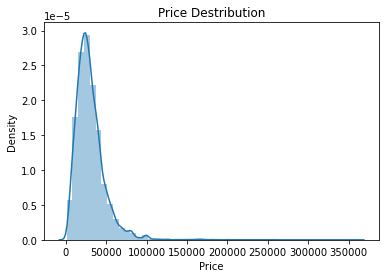

In [54]:
#checking the destribution of price
sns.distplot(df.Price)
plt.title("Price Destribution")

<AxesSubplot:xlabel='Price'>

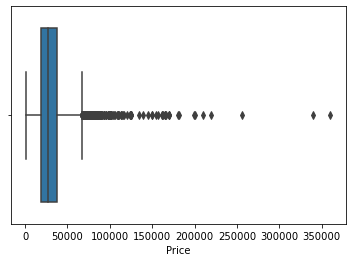

In [55]:
sns.boxplot(df.Price)

In [56]:
#let's fix it by only keeping data with std of 3 times our mean or less
print("Dataframe shape prior outlier cleaning in Price:", df.shape)
df = df[df.Price <= (df.Price.mean() + 3 * df.Price.std())]
print("Dataframe shape after outlier cleaning in Price:", df.shape)

Dataframe shape prior outlier cleaning in Price: (10015, 19)
Dataframe shape after outlier cleaning in Price: (9891, 19)


Text(0.5, 1.0, 'Price Destribution')

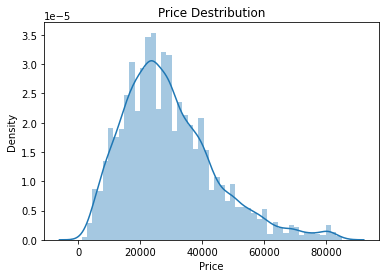

In [57]:
#checking the destribution of price again
sns.distplot(df.Price)
plt.title("Price Destribution")

<AxesSubplot:xlabel='Price'>

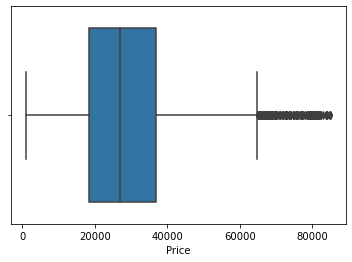

In [58]:
sns.boxplot(df.Price)

Text(0.5, 1.0, 'Mileage Distribution')

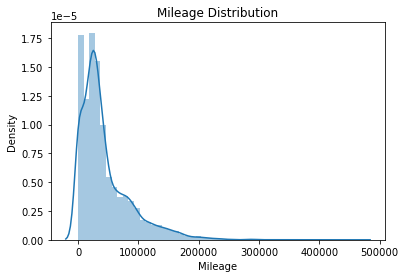

In [59]:
#Now let's lookinto Mileage data
sns.distplot(df.Mileage)
plt.title('Mileage Distribution')

In [60]:
#let's fix it by only keeping Mileages less than 200,500 miles
print("Dataframe shape prior outlier cleaning in Mileage:", df.shape)
df = df[df.Mileage <= 200500]
print("Dataframe shape after outlier cleaning in Mileage:", df.shape)

Dataframe shape prior outlier cleaning in Mileage: (9891, 19)
Dataframe shape after outlier cleaning in Mileage: (9815, 19)


Text(0.5, 1.0, 'Mileage Distribution')

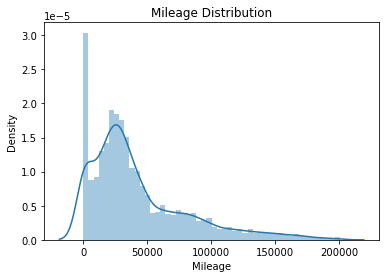

In [61]:
#Another look at the distribution post cleaning
sns.distplot(df.Mileage)
plt.title('Mileage Distribution')

In [62]:
#checking count of duplicate data
df.duplicated().sum()

996

In [63]:
#dropping duplicate data
print("Shape of data prior dropping duplicates", df.shape)
df.drop_duplicates(inplace=True)
print("Shape of data after dropping duplicates", df.shape)

Shape of data prior dropping duplicates (9815, 19)
Shape of data after dropping duplicates (8819, 19)


In [64]:
df.describe()

,Mileage,Rating,City MPG,Highway MPG,Entertainment Count,Safety Count,Price,Built Year
count,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000
mean,42803.285633,4.228030,21.459349,28.921193,1.831047,3.569792,29273.745096,2016.810183
std,38930.749214,0.797411,15.270756,23.871267,0.684556,1.417489,14741.860930,4.034978
min,1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000,2488.000000,1963.000000
25%,16751.000000,3.900000,17.000000,23.000000,1.000000,3.000000,18990.000000,2016.000000
50%,30875.000000,4.500000,20.000000,28.000000,2.000000,3.000000,26996.000000,2018.000000
75%,59084.000000,4.800000,24.000000,33.000000,2.000000,5.000000,37104.500000,2019.000000
max,200428.000000,5.000000,224.000000,414.000000,4.000000,7.000000,84999.000000,2021.000000


The minimum values for City MPG and Highway MPG is -1! This indicates that the NaN values were set to -1 for the numerical columns! Let's see how many they are:

In [65]:
df[df['City MPG'] == -1].value_counts().sum()

744

In [66]:
df[df['Highway MPG'] == -1].value_counts().sum()

749

Let's impute the missing values with the median:

In [67]:
df['City MPG'].replace({-1:df['City MPG'].median() }, inplace=True)
df['Highway MPG'].replace({-1:df['Highway MPG'].median() }, inplace=True)

In [68]:
df.describe()

,Mileage,Rating,City MPG,Highway MPG,Entertainment Count,Safety Count,Price,Built Year
count,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000
mean,42803.285633,4.228030,23.245266,31.403901,1.831047,3.569792,29273.745096,2016.810183
std,38930.749214,0.797411,13.685192,22.070151,0.684556,1.417489,14741.860930,4.034978
min,1.000000,1.000000,11.000000,15.000000,1.000000,1.000000,2488.000000,1963.000000
25%,16751.000000,3.900000,18.000000,25.000000,1.000000,3.000000,18990.000000,2016.000000
50%,30875.000000,4.500000,20.000000,28.000000,2.000000,3.000000,26996.000000,2018.000000
75%,59084.000000,4.800000,24.000000,33.000000,2.000000,5.000000,37104.500000,2019.000000
max,200428.000000,5.000000,224.000000,414.000000,4.000000,7.000000,84999.000000,2021.000000


In [69]:
df.shape

(8819, 19)

In [70]:
df.to_csv(r'C:\Users\nesha\Desktop\car_cleaned_data.csv')